In [2]:
# Prueba de hipótesis chi-square.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

from statsmodels.stats.diagnostic import lilliefors

In [4]:
path = "../datos/"
fname = "Tabla_A2_ppt_Ithaca.dat"

var = "Precipitation"

# Se lee el archivo .dat y se ajusta su formato.
df = pd.read_table(path + fname, names = ["Year", var])
df = df.set_index("Year")

df.shape

(50, 1)

In [17]:
# Ajuste de parámetros.

alpha, zeta, beta = stats.gamma.fit(
    df[var], loc = 0)
mu, sigma = stats.norm.fit( df[var] )

print(f"alpha {alpha:.3f}")

alpha 2.602


In [18]:
# Prueba Kolmogorov-Smirnov.

stat_n, p_n = lilliefors( df[var] )

print("Normal")
print(f"statistic: {stat_n:.3f}")
print(f"pvalue   : {p_n:.3f}")

# Lilliefors no está disponbile aún
# para la distribución. Kolmogorov
# puro subestima el error.
stat_g, p_g = stats.kstest( df[var],
    cdf = "gamma", args = (alpha, zeta, beta) )
crit_g = 0.135
alpha_test = 0.05

print("")
print("Gamma")
print(f"statistic : {stat_g:.3f}")
print(f"gamma crit: {crit_g:.3f}")
print(f"alpha     : {alpha_test:.3f}")

Normal
statistic: 0.131
pvalue   : 0.031

Gamma
statistic : 0.095
gamma crit: 0.135
alpha     : 0.050


(0.0, 1.0)

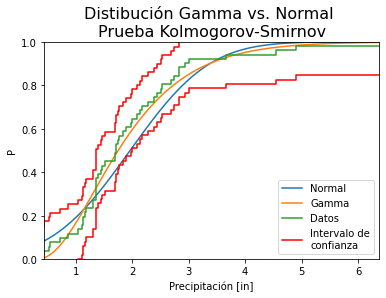

In [19]:
fig, ax = plt.subplots()

# Graficamos las distribuciones.
x = np.linspace( df[var].min(),
    df[var].max(), 1000 )

y_n = stats.norm.cdf(x, mu, sigma)
y_g = stats.gamma.cdf(x, alpha, zeta, beta)

ax.plot(x, y_n)
ax.plot(x, y_g)

# Grficamos la frecuencia acumulada.
# Criterio de Weibull.
ax.plot(df[var].sort_values(),
    range(1, len(df) + 1) / np.float64(len(df)+1),
    drawstyle = "steps")

# Graficamos los intervalos de confianza.
# Distribución Kolmogorov-Smirnov
ax.plot(df[var].sort_values(),
    range(1, len(df) + 1) / np.float64(len(df)+1)
    - crit_g, drawstyle = "steps", color = "red" )
ax.plot(df[var].sort_values(),
    range(1, len(df) + 1) / np.float64(len(df)+1)
    + crit_g, drawstyle = "steps", color = "red" )


ax.set_title("Distibución Gamma vs. Normal \n"
    "Prueba Kolmogorov-Smirnov",
    fontsize = 16)
ax.set_xlabel("Precipitación [in]")
ax.set_ylabel("P")
ax.legend(["Normal", "Gamma",
    "Datos", "Intervalo de\nconfianza"])
ax.set_xlim( df[var].min(), df[var].max() )
ax.set_ylim(0, 1)